In [31]:
import xarray as xr
import numpy as np
from math import nan
import matplotlib.pyplot as plt

from qtrendutils import linfit_utils as linfit
from qtrendutils import mapplot_utils as maps
from CASutils import plothisto_utils as histo

import importlib
importlib.reload(maps)
import sys

import warnings
warnings.filterwarnings('ignore')

In [32]:
plotpath="/project/cas/islas/python_plots/qtrend_paper/figures/supplemental/"

In [33]:
dat = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/OBS/vaporpressures/vaporpressures_ISD.nc")

### Finding the number of bad months.  Bad months is where there are more than 10 bad days in the month.

In [34]:
dropstations=[]
nbadmonths = xr.DataArray(np.zeros([dat.station.size]), coords=dat.station.coords, dims='station', name='nbadmonths')
for istation in np.arange(0,dat.station.size,1):
    test = dat.nbaddays.isel(station=istation)
    test = test.where(test > 10, drop=True)
    nbadmonths[istation] = test.size
    if (test.size > 48):
        badstation = dat.station.isel(station=istation).values
        badstation = np.array_str(badstation)
        dropstations.append(badstation)
        
datuse = dat.drop_sel(station=dropstations)
nbadmonthsuse = nbadmonths.drop_sel(station=dropstations)

In [35]:
print(datuse)

<xarray.Dataset>
Dimensions:   (station: 2439, time: 492)
Coordinates:
  * station   (station) object '01001099999' '01008099999' ... '98836099999'
  * time      (time) object 1980-01-16 00:00:00 ... 2020-12-16 00:00:00
Data variables:
    relhum    (time, station) float64 ...
    svp       (time, station) float64 ...
    vp        (time, station) float64 ...
    vpd       (time, station) float64 ...
    lon       (station) float64 ...
    lat       (station) float64 ...
    nbaddays  (station, time) int64 ...


### Dropping also stations that have a whole year of bad months

In [36]:
datuse_am = datuse.vp.groupby('time.year').mean('time')

In [37]:
dropstations=[]
for istation in np.arange(0,datuse_am.station.size,1):
    statdat = datuse_am.isel(station=istation)
    statdat = statdat.where(np.isnan(statdat), drop=True)
    if (statdat.size > 0):
        badstation = datuse_am.station.isel(station=istation).values
        badstation = np.array_str(badstation)
        dropstations.append(badstation)
        
datuse = datuse.drop_sel(station=dropstations)
nbadmonthsuse = nbadmonthsuse.drop_sel(station=dropstations)

In [39]:
print(len(dropstations))

39


In [38]:
print(datuse)

<xarray.Dataset>
Dimensions:   (station: 2400, time: 492)
Coordinates:
  * station   (station) object '01001099999' '01008099999' ... '98836099999'
  * time      (time) object 1980-01-16 00:00:00 ... 2020-12-16 00:00:00
Data variables:
    relhum    (time, station) float64 ...
    svp       (time, station) float64 ...
    vp        (time, station) float64 ...
    vpd       (time, station) float64 ...
    lon       (station) float64 ...
    lat       (station) float64 ...
    nbaddays  (station, time) int64 ...


0 267
0 < # <= 12 1624
12 < # <= 24 241
24 < # <= 36 169
36 < # <= 48 138


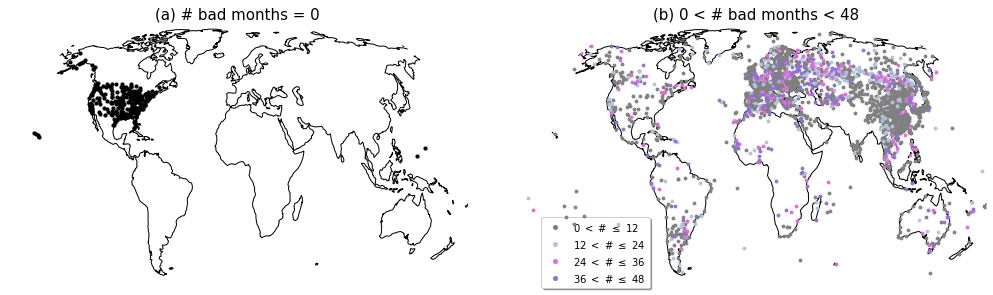

In [42]:
fig = plt.figure(figsize=(16,16))

#-----stations that have more than half of the days of data for all months
lonuse = datuse.lon ; latuse = datuse.lat
coords = xr.merge([lonuse, latuse])
coords = coords.where( nbadmonths == 0, drop=True)
ax = maps.contourmap_continentsonly_robinson_noborder_scatter_pos(fig, coords.lon*0,
                                                         np.array(coords.lon), np.array(coords.lat),0.2,-2,2,'(a) # bad months = 0',
                                                         0.05,0.45,0.75,0.97, onecolor=True, color='black')

print("0",coords.station.size)


#-----stations that have 
lonuse = dat.lon ; latuse = dat.lat
coords = xr.merge([lonuse, latuse])
coords = coords.where( (nbadmonths > 0) & (nbadmonths <= 12), drop=True)

ax = maps.contourmap_continentsonly_robinson_noborder_scatter_pos(fig, coords.lon*0,
                                                         np.array(coords.lon), np.array(coords.lat),0.2,-2,2,'(b) 0 < # bad months < 48',
                                                                  0.5,0.9,0.75,0.97, onecolor=True, color='gray', markersize=8)
print("0 < # <= 12",coords.station.size)


lonuse = dat.lon ; latuse = dat.lat
coords = xr.merge([lonuse, latuse])
coords = coords.where( (nbadmonths > 12) & (nbadmonths <= 24), drop=True)

ax = maps.contourmap_continentsonly_robinson_noborder_scatter_pos(fig, coords.lon*0,
                                                         np.array(coords.lon), np.array(coords.lat),0.2,-2,2,' ',
                                                                  0.5,0.9,0.75,0.97, onecolor=True, color='lightsteelblue', oplot=True, ax=ax, markersize=8)

print("12 < # <= 24",coords.station.size)

lonuse = dat.lon ; latuse = dat.lat
coords = xr.merge([lonuse, latuse])
coords = coords.where( (nbadmonths > 24) & (nbadmonths <= 36), drop=True)

ax = maps.contourmap_continentsonly_robinson_noborder_scatter_pos(fig, coords.lon*0,
                                                         np.array(coords.lon), np.array(coords.lat),0.2,-2,2,' ',
                                                                  0.5,0.9,0.75,0.97, onecolor=True, color='orchid', oplot=True, ax=ax, markersize=8)

print("24 < # <= 36",coords.station.size)

lonuse = dat.lon ; latuse = dat.lat
coords = xr.merge([lonuse, latuse])
coords = coords.where( (nbadmonths > 36) & (nbadmonths <= 48), drop=True)

ax = maps.contourmap_continentsonly_robinson_noborder_scatter_pos(fig, coords.lon*0,
                                                         np.array(coords.lon), np.array(coords.lat),0.2,-2,2,' ',
                                                                  0.5,0.9,0.75,0.97, onecolor=True, color='mediumpurple', oplot=True, ax=ax, markersize=8)

print("36 < # <= 48",coords.station.size)

from matplotlib.lines import Line2D
legendparts = [ Line2D([0],[0], color='w', markeredgecolor='gray', markerfacecolor='gray', marker='o', markersize=4),
                Line2D([0],[0], color='w', markeredgecolor='lightsteelblue', markerfacecolor='lightsteelblue', marker='o', markersize=4),
                Line2D([0],[0], color='w', markeredgecolor='orchid', markerfacecolor='orchid', marker='o', markersize=4),
                Line2D([0],[0], color='w', markeredgecolor='mediumpurple', markerfacecolor='mediumpurple', marker='o', markersize=4)]
legendlabels=['0 $<$ # $\leq$ 12','12 $<$ # $\leq$ 24','24 $<$ # $\leq$ 36', '36 $<$ # $\leq$ 48']
ax.legend(legendparts, legendlabels, bbox_to_anchor = (0.28,0.26), ncol=1, frameon = True, facecolor='white', edgecolor=None,
          framealpha=None, shadow=True)


fig.savefig(plotpath+'stations.pdf', bbox_inches='tight', facecolor='white')

### Stations ignored

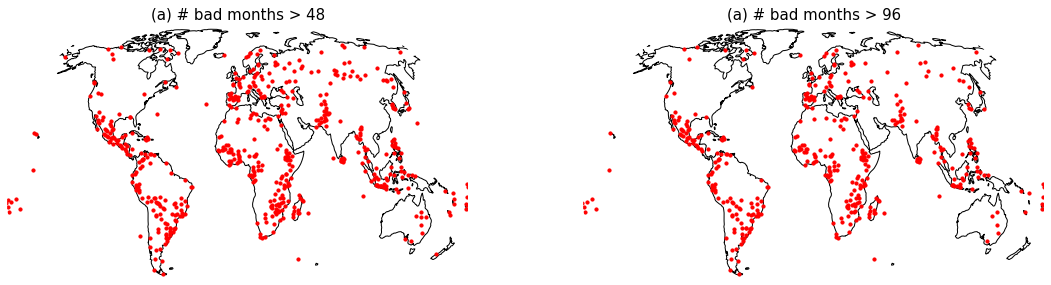

In [111]:
fig = plt.figure(figsize=(16,16))

#-----stations that have more than half of the days of data for all months
lonuse = dat.lon.isel(time=0) ; latuse = dat.lat.isel(time=0)
coords = xr.merge([lonuse, latuse])
coords = coords.where( nbadmonths > 48, drop=True)
ax = maps.contourmap_continentsonly_robinson_noborder_scatter_pos(fig, coords.lon*0,
                                                         np.array(coords.lon), np.array(coords.lat),0.2,-2,2,'(a) # bad months > 48',
                                                         0.05,0.45,0.75,0.97, onecolor=True, color='red')


lonuse = dat.lon.isel(time=0) ; latuse = dat.lat.isel(time=0)
coords = xr.merge([lonuse, latuse])
coords = coords.where( nbadmonths > 72, drop=True)
ax = maps.contourmap_continentsonly_robinson_noborder_scatter_pos(fig, coords.lon*0,
                                                         np.array(coords.lon), np.array(coords.lat),0.2,-2,2,'(a) # bad months > 96',
                                                         0.55,0.95,0.75,0.97, onecolor=True, color='red')


fig.savefig(plotpath+'stations_ignored.pdf', bbox_inches='tight', facecolor='white')